Name: Pratik Sushil Tirpude

Project Title: AI for Comparative price analysis in Interior design

Track: Time series model

In [ ]:
# Dataset

import pandas as pd

# Load dataset
df = pd.read_csv("interior_design_prices.csv", parse_dates=["Date"])
print(df.head())
print(df.info())
print(df['Category'].unique())


        Date   Category     Price
0 2022-01-01  Furniture  25248.36
1 2022-02-01  Furniture  25180.87
2 2022-03-01  Furniture  25826.34
3 2022-04-01  Furniture  26519.04
4 2022-05-01  Furniture  25898.02
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      144 non-null    datetime64[ns]
 1   Category  144 non-null    object        
 2   Price     144 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.5+ KB
None
['Furniture' 'Lighting' 'Flooring' 'Decor']


Here, we have ensured the data is loaded correctly.

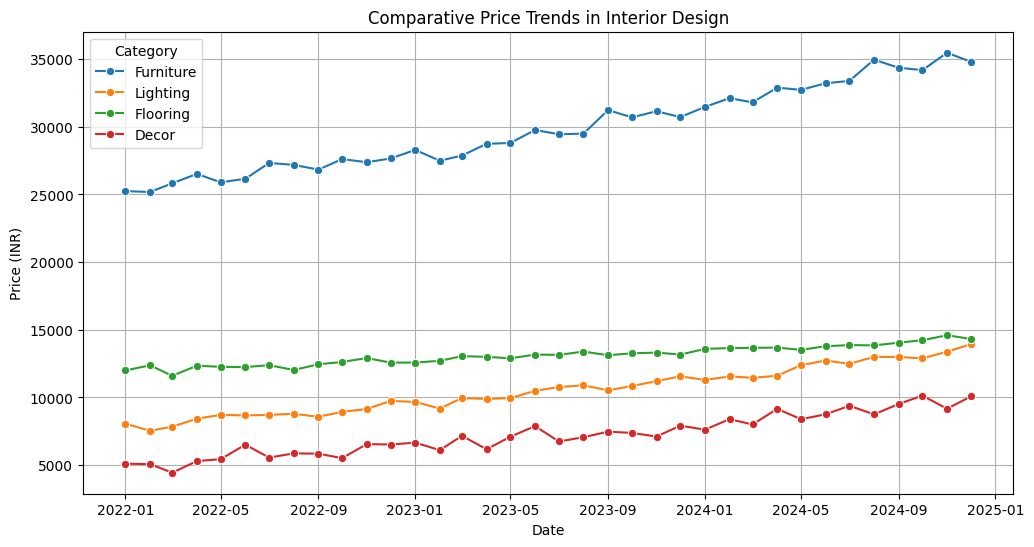

In [ ]:
#Exploratory data analysis

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Price", hue="Category", marker="o")
plt.title("Comparative Price Trends in Interior Design")
plt.ylabel("Price (INR)")
plt.xlabel("Date")
plt.grid(True)
plt.show()


In the above line chart, we can see the plotted charts for Furniture, Lighting, Florring and Decor.
From the chart we can clearly see the consistent price rise in the Furniture and Decor category.

In [ ]:
#Growth and volatility analysis

df_sorted = df.sort_values(["Category","Date"]).copy()
df_sorted["Monthly_Return"] = df_sorted.groupby("Category")["Price"].pct_change()

summary = df_sorted.groupby("Category").agg(
    Start_Price=("Price", lambda s: s.iloc[0]),
    End_Price=("Price", lambda s: s.iloc[-1]),
    Months=("Price", "count"),
    Avg_Monthly_Return=("Monthly_Return", "mean"),
    Volatility=("Monthly_Return", "std")
).reset_index()

# CAGR calculation
def calc_cagr(start, end, months):
    years = months / 12
    return (end/start)**(1/years) - 1

summary["CAGR"] = summary.apply(lambda r: calc_cagr(r["Start_Price"], r["End_Price"], r["Months"]), axis=1)
print(summary)


    Category  Start_Price  End_Price  Months  Avg_Monthly_Return  Volatility  \
0      Decor      5103.02   10073.30      36            0.024557    0.101688   
1   Flooring     11992.83   14323.64      36            0.005332    0.022421   
2  Furniture     25248.36   34804.65      36            0.009451    0.022257   
3   Lighting      8062.66   13932.46      36            0.016323    0.034476   

       CAGR  
0  0.254435  
1  0.060988  
2  0.112930  
3  0.200005  


Here, from CAGR we can clearly see that the Decor has the fastest growth rate, while from Volatility we can conclude that Furniture has the most stable growth.

In [ ]:
# Forecasting

!pip install prophet


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpazrnlnn1/jl8t054d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpazrnlnn1/p89hzaf3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38922', 'data', 'file=/tmp/tmpazrnlnn1/jl8t054d.json', 'init=/tmp/tmpazrnlnn1/p89hzaf3.json', 'output', 'file=/tmp/tmpazrnlnn1/prophet_modeli6xflniu/prophet_model-20250909120807.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:08:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



==== Forecasting: Furniture ====


12:08:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


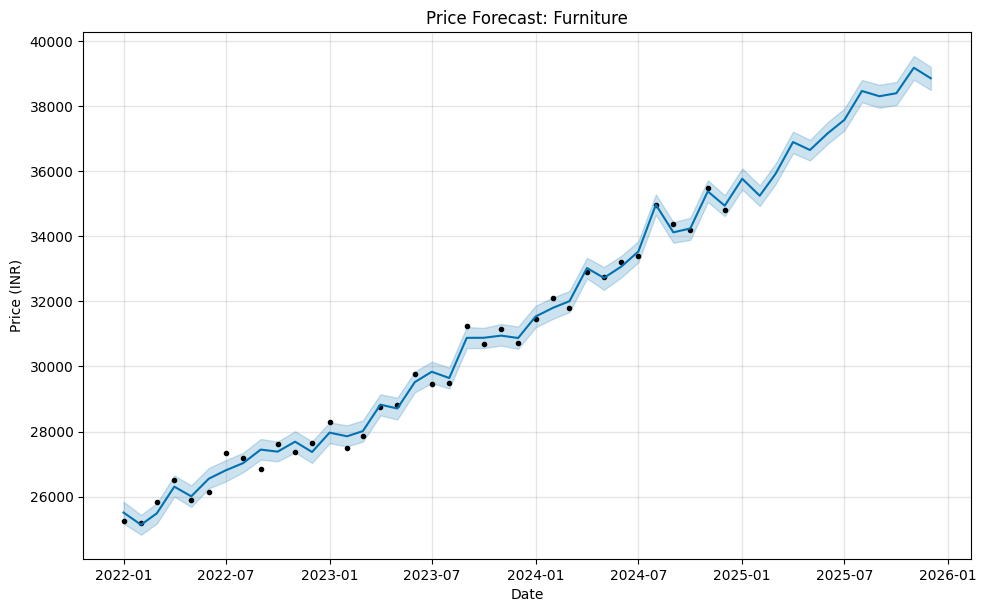

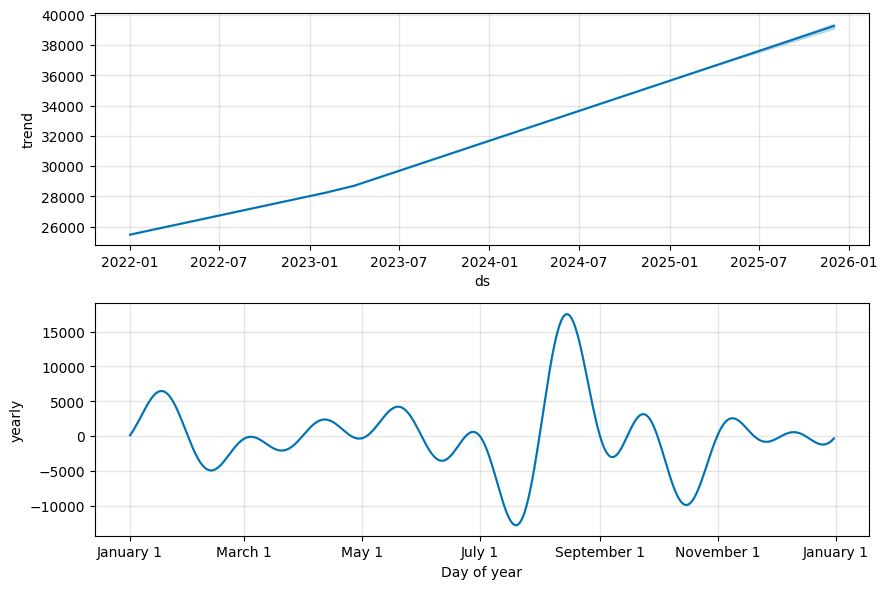

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpazrnlnn1/xbpm8im6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpazrnlnn1/cwr__lz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39479', 'data', 'file=/tmp/tmpazrnlnn1/xbpm8im6.json', 'init=/tmp/tmpazrnlnn1/cwr__lz0.json', 'output', 'file=/tmp/tmpazrnlnn1/prophet_modelca67mx55/prophet_model-20250909120808.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:08:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Saved: forecast_furniture.csv

==== Forecasting: Lighting ====


12:08:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


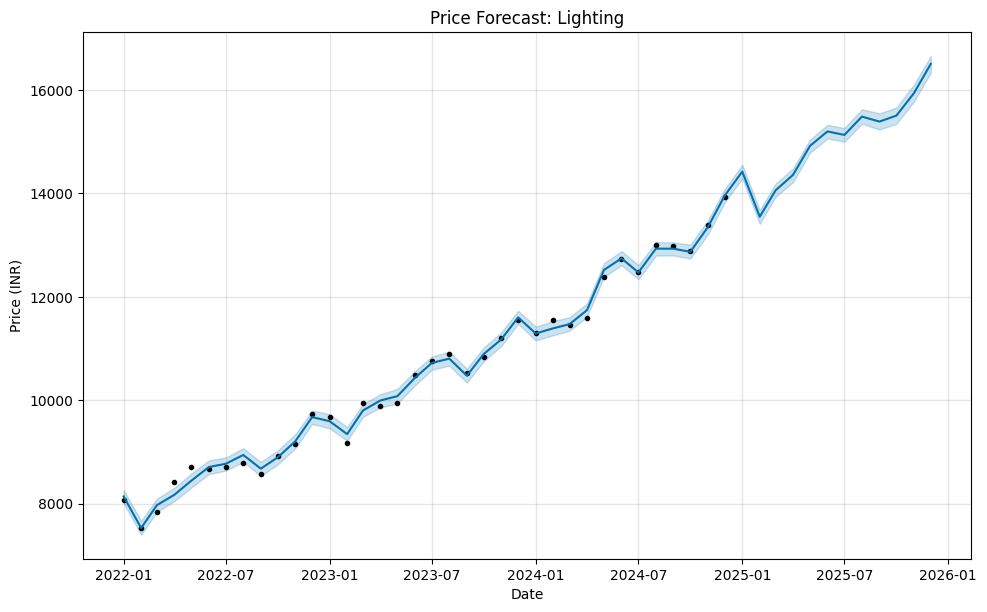

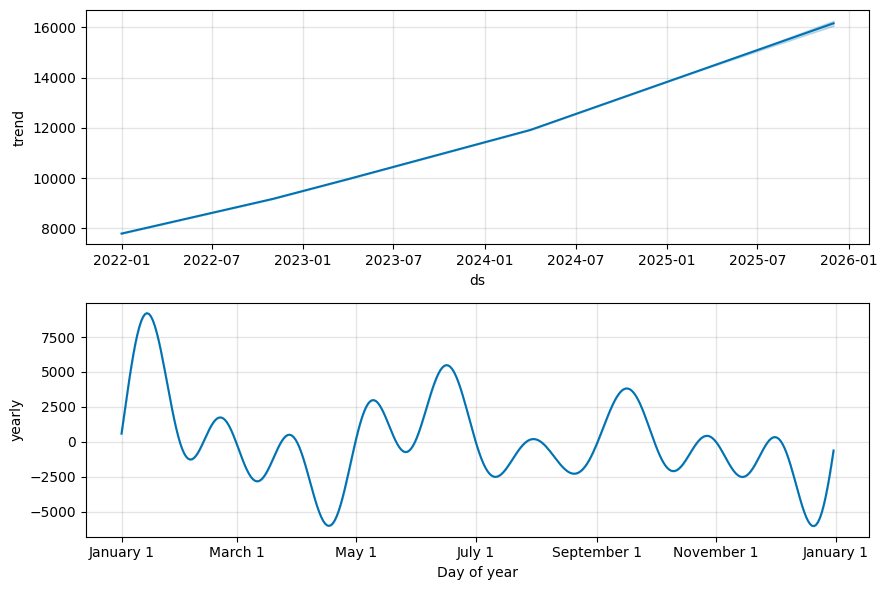

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpazrnlnn1/9o6pevze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpazrnlnn1/4jpj2g2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7223', 'data', 'file=/tmp/tmpazrnlnn1/9o6pevze.json', 'init=/tmp/tmpazrnlnn1/4jpj2g2g.json', 'output', 'file=/tmp/tmpazrnlnn1/prophet_modelpv___ql7/prophet_model-20250909120809.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:08:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Saved: forecast_lighting.csv

==== Forecasting: Flooring ====


12:08:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


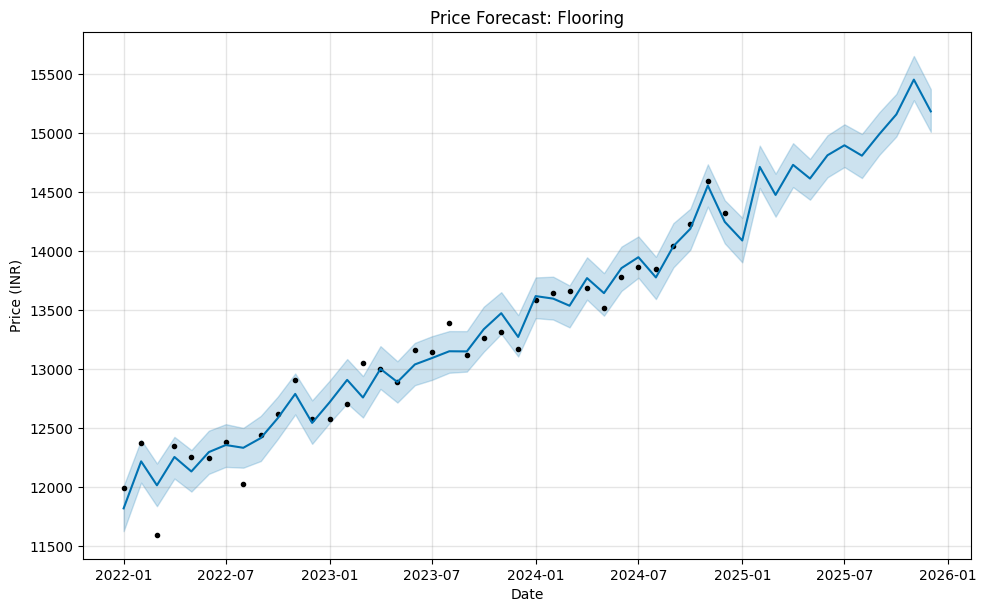

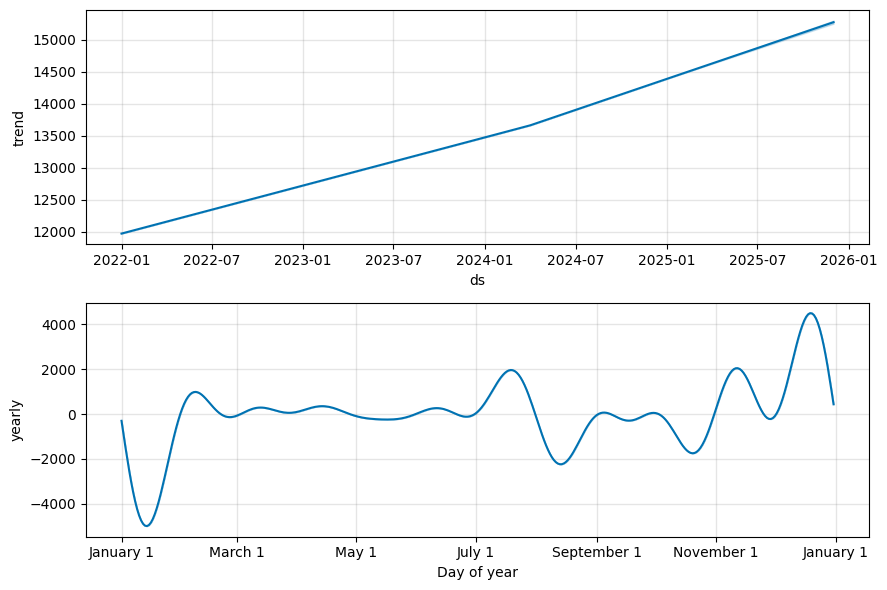

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpazrnlnn1/pdigwgok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpazrnlnn1/1sk7eumb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69130', 'data', 'file=/tmp/tmpazrnlnn1/pdigwgok.json', 'init=/tmp/tmpazrnlnn1/1sk7eumb.json', 'output', 'file=/tmp/tmpazrnlnn1/prophet_model0w0u9cao/prophet_model-20250909120810.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:08:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Saved: forecast_flooring.csv

==== Forecasting: Decor ====


12:08:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


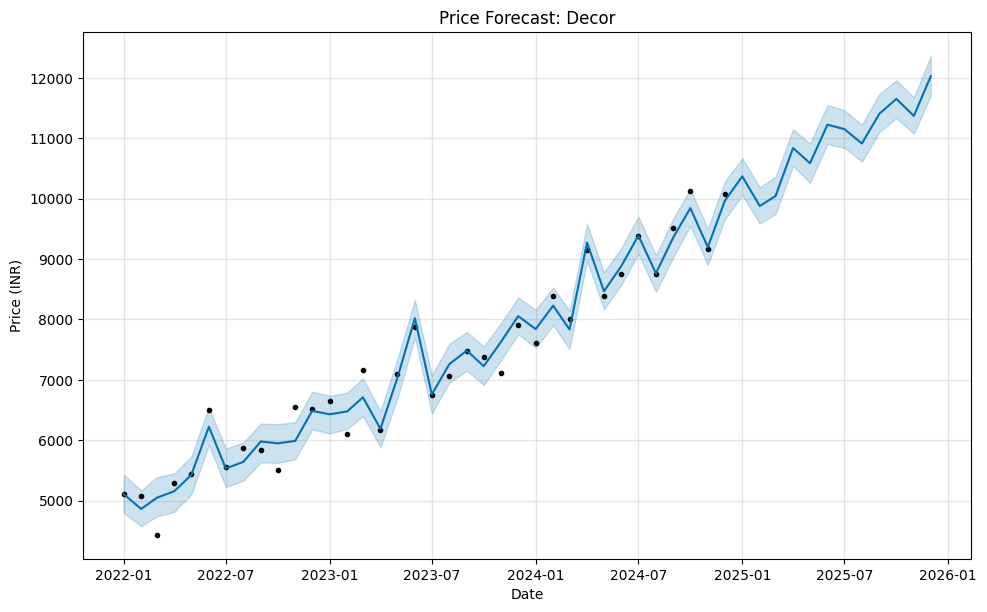

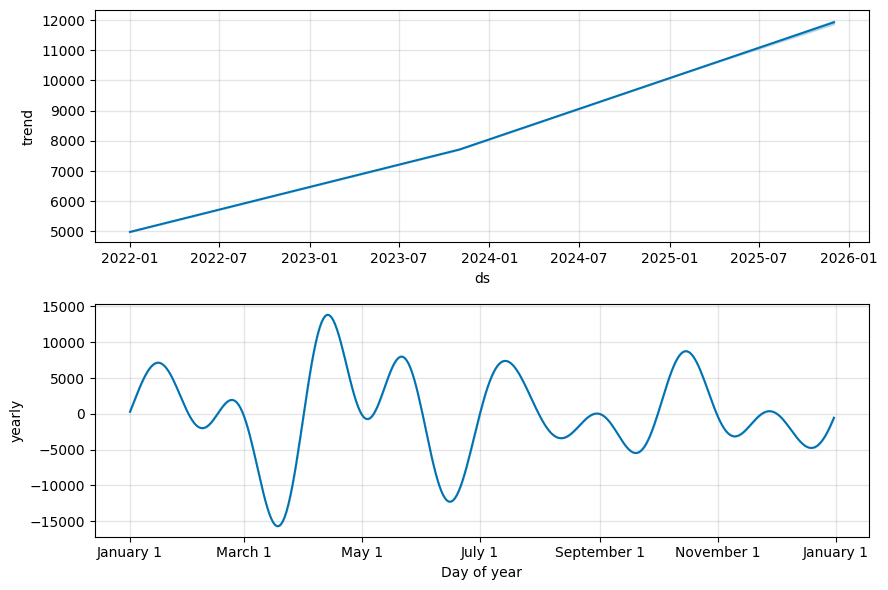

Saved: forecast_decor.csv


,Category,Avg_Predicted_Price_Next12M
0,Furniture,37363.680106
1,Lighting,15036.804860
2,Flooring,14826.136045
3,Decor,10955.304199


Saved: future_summary_next12m.csv


In [11]:
#Forecasting each category

categories = df['Category'].unique()
all_forecasts = {}
for cat in categories:
    print(f'\n==== Forecasting: {cat} ====')
    sub = df[df['Category'] == cat].sort_values('Date')
    ts = sub[['Date','Price']].rename(columns={'Date':'ds','Price':'y'})
    m = Prophet()
    m.fit(ts)
    future = m.make_future_dataframe(periods=12, freq='MS')
    fcst = m.predict(future)
    all_forecasts[cat] = fcst
    fig1 = m.plot(fcst)
    plt.title(f'Price Forecast: {cat}')
    plt.xlabel('Date')
    plt.ylabel('Price (INR)')
    plt.show()
    fig2 = m.plot_components(fcst)
    plt.show()
    out_path = f'forecast_{cat.lower()}.csv'
    fcst[['ds','yhat','yhat_lower','yhat_upper']].to_csv(out_path, index=False)
    print('Saved:', out_path)

future_summary = []
for cat, fcst in all_forecasts.items():
    tail = fcst.tail(12)
    future_summary.append({'Category': cat, 'Avg_Predicted_Price_Next12M': tail['yhat'].mean()})
future_summary_df = pd.DataFrame(future_summary)
display(future_summary_df)
future_summary_df.to_csv('future_summary_next12m.csv', index=False)
print('Saved: future_summary_next12m.csv')

In [19]:
#Evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

evaluation_results = []

for cat in df['Category'].unique():
    # Load forecast CSV
    fcst = pd.read_csv(f"forecast_{cat.lower()}.csv", parse_dates=["ds"])

    # Get actual data
    actual = df[df["Category"] == cat][["Date", "Price"]].rename(columns={"Date":"ds","Price":"y"})

    # Define train-test split (train until 2023, test = 2024)
    test = actual[actual["ds"] > "2023-12-01"]

    # Match predictions with test set
    pred = fcst[fcst["ds"].isin(test["ds"])]

    if pred.empty:
        print(f"No forecast data matched for {cat}, skipping.")
        continue

    # Align by merging on 'ds' (to avoid index mismatch)
    merged = test.merge(pred[["ds","yhat"]], on="ds", how="inner")

    if merged.empty:
        print(f"Could not align actual vs forecast for {cat}, skipping.")
        continue

    # Compute metrics
    mae = mean_absolute_error(merged['y'], merged['yhat'])
    mse = mean_squared_error(merged['y'], merged['yhat'])
    rmse = np.sqrt(mse)   # manual RMSE

    print(f"{cat} → MAE={mae:.2f}, RMSE={rmse:.2f}")

    evaluation_results.append({
        "Category": cat,
        "MAE": mae,
        "RMSE": rmse
    })

# Save evaluation results to CSV
if evaluation_results:
    eval_df = pd.DataFrame(evaluation_results)
    display(eval_df)
    eval_df.to_csv("evaluation_summary.csv", index=False)
    print("Saved: evaluation_summary.csv")
else:
    print("No evaluation results generated.")



Furniture → MAE=127.76, RMSE=155.22
Lighting → MAE=57.55, RMSE=79.53
Flooring → MAE=67.01, RMSE=75.68
Decor → MAE=124.95, RMSE=148.36


,Category,MAE,RMSE
0,Furniture,127.757352,155.223775
1,Lighting,57.548254,79.533711
2,Flooring,67.012916,75.684801
3,Decor,124.950159,148.362048


Saved: evaluation_summary.csv
